# Домашнее задание №3. 
## Conway's Game Of Life
#### Виталий Емельянов

### Однопоточная реализация игры

Однопоточная версия реализована в классе $\texttt{GameOfLifeSingleThread}$. Временная асимптотическая сложность реализации $O(n^2)$, где $n$ - размер стороны поля. Запускается 11 экспериментов на поле различного размера, измеряется время работы 100 эпох игры.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

sizes = [10] + list(range(100, 1100, 100))
timeInNano = np.array([12482820, 77134255, 225756462, 512212255, 873879354, 1435017706, 1985967132, 2717242306, 3520266174, 4493067591, 5534482386])

#### График зависимости времени работы 100 эпох игры в зависимости от размера поля

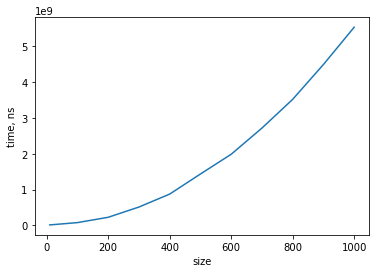

In [3]:
plt.plot(sizes, timeInNano)
plt.xlabel("size")
plt.ylabel("time, ns")

#### График зависимости $\log$ времени работы 100 эпох игры в зависимости от размера поля

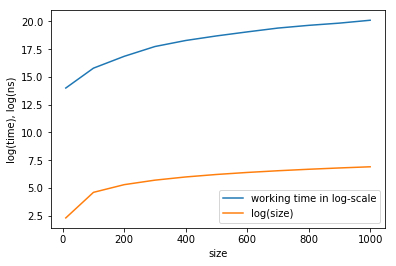

In [19]:
plt.plot(sizes, np.log(timeInNano), label="working time in log-scale")
plt.plot(sizes, np.log(sizes), label="log(size)")
plt.xlabel("size")
plt.ylabel("log(time), log(ns)")
plt.legend()

Мы видим,что логарифм времени работы - это функция близкая по форме к логарифму аргумента, то есть временная сложность реализации действительно равна $O(n^2)$, как и ожидалось. 

### Многопоточная реализация игры

Код реализации можно найти в классе $\texttt{𝙶𝚊𝚖𝚎𝙾𝚏𝙻𝚒𝚏𝚎MultiT𝚑𝚛𝚎𝚊𝚍}$. Реализация основана на том чтобы, разбить поле на блоки размера $B \times W$, где $B$ - размер блока, $W$  - ширина поля. Размер блока высчитывается по формуле: $$B = \lceil \frac{H}{T} \rceil,$$ где $H$ - высоты поля, $T$ - количество потоков $\texttt{ExecutorService}$.

Ожидаемая временная сложность работы алгоритма $T(n) = H \cdot B$. Для фиксированного количества потоков асимптотическая сложность по прежнему равна $O(n^2)$ (когда $H=W=n$), то есть время работы алгоритмы уменьшается лишь в константу раз.



#### График зависимости времени работы 100 эпох игры в зависимости от размера поля

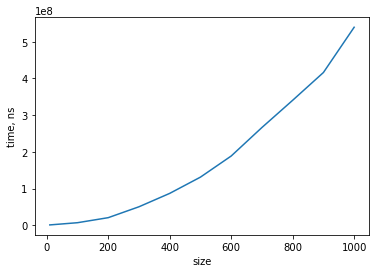

In [15]:
sizes = [10] + list(range(100, 1100, 100))
timeInNano = np.array([1204428, 7215110, 20924291, 50585061, 87033467, 131284281, 188744260, 266361002, 340468374, 416041799, 539270742])

plt.plot(sizes, timeInNano)
plt.xlabel("size")
plt.ylabel("time, ns")

И, по-прежнему, асимптотическая сложность остается квадратичной, что мы и видим на графике ниже.

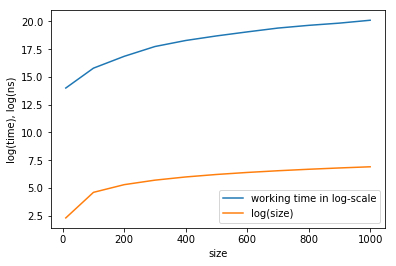

In [18]:
plt.plot(sizes, np.log(timeInNano), label="working time in log-scale")
plt.plot(sizes, np.log(sizes), label="log(size)")
plt.xlabel("size")
plt.ylabel("log(time), log(ns)")
plt.legend()